# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для  компании «Цифра», которая разрабатывает решения для эффективной работы промышленных предприятий. 

В нашем распоряжении есть данные с параметрами добычи и очистки. Модель должна предсказывать коэффициент восстановления золота из золотосодержащей руды. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Данные находятся в трёх файлах:
   
   gold_recovery_train_new.csv — обучающая выборка;
   
   gold_recovery_test_new.csv — тестовая выборка;
   
   gold_recovery_full_new.csv — исходные данные.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Проверка-правильности-рассчёта-эффективности" data-toc-modified-id="Проверка-правильности-рассчёта-эффективности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка правильности рассчёта эффективности</a></span></li><li><span><a href="#Изучение-тестовой-выборки" data-toc-modified-id="Изучение-тестовой-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение тестовой выборки</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Флотация" data-toc-modified-id="Флотация-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Флотация</a></span></li><li><span><a href="#Очистка" data-toc-modified-id="Очистка-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Очистка</a></span></li><li><span><a href="#Объединение" data-toc-modified-id="Объединение-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Объединение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

In [38]:
! pip install progressbar2

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time
from progressbar.bar import ProgressBar
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

### Загрузка данных

Загрузим данные из файлов:

In [40]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

### Проверка правильности рассчёта эффективности

Создадим функцию отображения важной информации о данных:

In [41]:
def show_tables(df):
    display(df.sample(n = 5, random_state = 12345))
    display(df.info())
    display(df.describe(include='all').T)

Применим её к первой таблице:

In [42]:
show_tables(train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4899,2017-01-10 03:59:59,3.712425,8.033828,13.631412,48.473231,70.709139,8.845224,2.632767,10.380058,2.675636,163.177905,7.967757,7.704,1.023213,7.264758,9.354294,10.705586,37.804500,16.033293,3.450271,7.103812,2.481386,1598.380651,-499.975295,1602.447026,-500.159509,1602.593871,-499.023157,1603.906718,-500.621014,46398.973438,2626.684025,2626.720531,3.529048,8.245385,2.284081,502.155979,48.657398,36.506136,8.060631,10.999542,5.998825,10.999828,5.998886,14.071949,5.209236,34.100302,19.262950,85.590094,5.663056,0.627349,18.461484,1.809670,1002.305870,-499.823999,1248.812007,-500.266197,1251.192567,-500.793411,1249.671430,-501.197295,1098.997816,-499.784043,999.794178,-501.568704,13.086033,3.317501,7.254092,1.915541,29.984604,-237.695960,27.910667,-500.270243,30.994364,-498.732427,25.004388,-500.046050,13.991523,-500.874847,12.074159,-500.703556,14.187136,-500.286314,8.032679,-500.363601,20.024847,-601.179514
4590,2016-08-27 22:59:59,5.978141,9.574893,8.422982,44.573758,68.039692,8.567373,3.003479,7.918957,3.592308,96.297428,8.919051,7.490,0.746068,8.558805,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,14149,14149,2017-06-23 14:59:59,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final.output.concentrate_ag,14148,NaN,NaN,NaN,5.14203,1.36959,0,4.21162,4.99465,5.85954,16.0019
final.output.concentrate_pb,14148,NaN,NaN,NaN,10.133,1.65493,0,9.29735,10.2971,11.1706,17.0319
final.output.concentrate_sol,13938,NaN,NaN,NaN,9.20285,2.79052,0,7.48465,8.84546,10.4875,18.1249
final.output.concentrate_au,14149,NaN,NaN,NaN,44.0038,4.90526,0,43.2761,44.8724,46.1664,52.7566
...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,14148,NaN,NaN,NaN,-483.956,37.8928,-797.142,-500.363,-499.702,-487.712,-275.073
secondary_cleaner.state.floatbank5_b_air,14148,NaN,NaN,NaN,13.0646,5.76562,0.646208,8.9944,11.9975,17.9829,27.926
secondary_cleaner.state.floatbank5_b_level,14148,NaN,NaN,NaN,-483.967,39.2079,-800.006,-500.106,-499.915,-453.187,-157.396
secondary_cleaner.state.floatbank6_a_air,14147,NaN,NaN,NaN,19.5775,5.76442,0.195324,14.9893,19.9842,24.9916,32.1889


Проверим, правильно ли рассчитана эффективность обогащения чернового и финального концентратов. Для этого создадим функцию, рассчитывающую среднюю абсолютную ошибку рассчета эффективности:

In [43]:
def MAE_of_recovery(recovery, op_conc_au, ip_conc_au, tail_conc_au):
    np.seterr(divide='ignore', invalid='ignore')
    recovery_true = (op_conc_au * (ip_conc_au - tail_conc_au) /
                     ip_conc_au / (op_conc_au - tail_conc_au) * 100)
    AE = recovery_true - recovery
    MAE = sum(AE) / len(AE)
    return MAE

In [44]:
MAE_rougher_train = MAE_of_recovery(train['rougher.output.recovery'].values, 
                                    train['rougher.output.concentrate_au'].values, 
                                    train['rougher.input.feed_au'].values, 
                                    train['rougher.output.tail_au'].values)
print('Средняя абсолютная ошибка рассчёта эффективности обогащения чернового концентрата:', MAE_rougher_train)

Средняя абсолютная ошибка рассчёта эффективности обогащения чернового концентрата: -2.875013896548571e-17


Средняя ошибка очень маленькая (порядка 10 в -17 степени) - возможно она возникла в результате того, что в таблице есть пропуски. Можно сделать вывод, что эффективность рассчитана правильно.

### Изучение тестовой выборки

Посмотрим на таблицу тестовой выборки:

In [45]:
show_tables(test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
3059,2017-09-23 13:59:59,191.516501,8.512363,7.055,1.363213,1.450592e+03,-497.408756,1.449222e+03,-503.851176,1.446431e+03,-501.375352,1.450879e+03,-500.188336,6.020333,4.284092,591.740797,61.819372,41.952757,8.022070,17.004900,6.697103,16.997039,6.697300,998.607461,-300.074927,1298.502486,-500.214034,1250.176306,-500.859297,1200.365415,-499.626884,999.690549,-499.618515,999.866350,-500.804722,25.916226,-499.975415,21.063334,-499.740490,22.009029,-499.883786,13.982725,-499.861180,12.040520,-499.248216,8.992746,-397.450195,9.120252,-499.374966,7.050235,-497.296824,9.992202,-499.768321
967,2016-10-21 09:59:59,132.578251,7.463113,7.130,1.285660,1.580076e+03,-499.572139,1.696802e+03,-500.323478,1.698635e+03,-500.783048,1.700506e+03,-500.860862,9.470634,3.421297,371.668017,42.241030,33.620812,10.315295,13.985305,7.000226,14.021627,7.000982,1005.084489,-299.563220,1403.724629,-399.462611,1404.111167,-399.517432,1310.913878,-400.060010,1202.609030,-299.366711,1202.433335,-300.525586,31.999562,-499.605753,26.959309,-500.016261,33.024442,-500.052120,31.111452,-499.684267,20.023207,-498.618363,17.016355,-500.640003,17.092744,-499.159348,14.015016,-487.092680,21.565209,-658.690743
5040,2017-12-20 05:59:59,243.104320,14.012229,8.510,1.542704,1.553023e+03,-500.509477,1.550945e+03,-535.592945,1.428885e+03,-477.447849,1.550159e+03,-499.562967,12.318574,5.128124,555.789959,55.860721,41.821250,11.614433,14.900006,7.202164,14.890324,7.194495,1196.918094,-300.059596,1196.662586,-500.545793,1099.264557,-500.197228,999.444199,-500.412481,900.087147,-500.409809,900.371626,-501.650913,26.587323,-499.697069,23.607798,-500.057243,24.949171,-500.303571,20.313622,-499.943855,19.988108,-497.249334,15.136500,-498.593533,10.999085,-498.299175,8.961507,-499.975964,11.978406,-499.142050
5185,2017-12-27 11:59:59,7.469704,NaN,7.200,0.004984,5.445860e-32,-782.195107,6.647490e-32,-496.247779,4.033736e-32,-799.929370,4.039220e-32,-798.764856,11.450708,5.413574,NaN,65.574392,41.058594,11.629298,NaN,0.004386,0.005890,NaN,-0.042069,-654.799234,-0.721806,-650.033492,2.426204,-647.231558,-0.927401,-518.194683,-1.915434,-139.7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,5290,5290,2016-12-18 05:59:59,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primary_cleaner.input.sulfate,5286,NaN,NaN,NaN,174.84,43.0271,2.56616,147.121,177.828,208.125,265.983
primary_cleaner.input.depressant,5285,NaN,NaN,NaN,8.6836,3.07205,0.00383948,6.48955,8.05221,10.0278,40
primary_cleaner.input.feed_size,5290,NaN,NaN,NaN,7.26634,0.610219,5.65,6.89,7.25,7.6,15.5
primary_cleaner.input.xanthate,5286,NaN,NaN,NaN,1.3838,0.643474,0.00498367,0.907623,1.19761,1.79782,4.10245
primary_cleaner.state.floatbank8_a_air,5290,NaN,NaN,NaN,1539.49,116.798,5.44586e-32,1498.94,1585.13,1602.08,2103.1
primary_cleaner.state.floatbank8_a_level,5290,NaN,NaN,NaN,-497.666,19.9524,-795.316,-500.357,-499.969,-499.569,-57.1954
primary_cleaner.state.floatbank8_b_air,5290,NaN,NaN,NaN,1545.17,122.225,6.64749e-32,1498.97,1595.62,1602.32,1813.08
primary_cleaner.state.floatbank8_b_level,5290,NaN,NaN,NaN,-500.273,32.9683,-799.997,-500.703,-500.029,-499.293,-142.527
primary_cleaner.state.floatbank8_c_air,5290,NaN,NaN,NaN,1527.27,122.538,4.03374e-32,1473.23,1549.59,1601.14,1715.05


Выведем на экран признаки, которых нет в тестовой выборке:

In [46]:
for i in (train.columns):
    if not i in(test.columns):
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

В тестовой выборке отсутствуют параметры продуктов каждого этапа восстановления золота. Кроме того, отсутствуют расчетные значения. Эти столбцы нужно будет убрать из обучающей выборки (кроме эффективности, так как она - целевой признак).

### Заполнение пропусков

Посмотрим на исходные данные:

In [47]:
show_tables(df)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
5264,2016-10-04 14:59:59,6.794600,9.054957,16.004123,43.648261,69.972633,11.069316,3.055067,9.719336,3.595190,169.234951,4.953443,7.690000,0.698405,11.237791,9.662701,12.094834,28.798004,14.977424,2.491817,9.841859,3.990274,1647.375514,-500.027845,1649.039765,-500.453535,1650.484821,-499.911583,1648.810343,-499.992179,43945.026256,2221.642453,2220.387968,2.402524,10.681821,4.181022,449.566539,43.582140,35.058594,10.045005,9.954251,6.767343,9.951436,6.780692,14.404704,7.442773,28.935364,21.587819,87.785434,6.236329,0.548703,16.079437,2.074216,1001.081955,-499.458157,1359.231962,-399.994446,1399.747849,-398.832793,1404.104960,-399.685716,1199.394217,-400.198197,1100.804763,-399.907908,13.885512,3.451496,8.273797,4.025239,24.966723,-499.771526,19.982444,-500.471879,25.099880,-500.367778,22.953438,-499.878244,14.028001,-498.910216,13.032441,-500.358286,10.143363,-499.314485,8.147565,-499.650507,22.997377,-499.900959
12699,2017-09-17 21:59:59,5.110333,11.114576,7.572588,44.725173,69.415110,7.484338,2.814891,12.347273,2.740724,204.209016,8.536404,7.150000,1.6231

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,19439,19439,2017-06-23 14:59:59,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
final.output.concentrate_ag,19438,NaN,NaN,NaN,5.16847,1.37235,0,4.25124,5.06609,5.89553,16.0019
final.output.concentrate_pb,19438,NaN,NaN,NaN,9.97889,1.66924,0,9.13726,10.1024,11.0358,17.0319
final.output.concentrate_sol,19228,NaN,NaN,NaN,9.50122,2.78754,0,7.72282,9.21896,10.9478,19.6157
final.output.concentrate_au,19439,NaN,NaN,NaN,44.0765,5.12978,0,43.4022,45.0112,46.2753,52.7566
...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438,NaN,NaN,NaN,-488.684,34.5334,-797.324,-500.458,-499.803,-498.384,-244.484
secondary_cleaner.state.floatbank5_b_air,19438,NaN,NaN,NaN,12.1982,5.33302,0.528083,8.97111,11.0194,14.0191,27.926
secondary_cleaner.state.floatbank5_b_level,19438,NaN,NaN,NaN,-487.15,38.3473,-800.22,-500.129,-499.935,-499.437,-137.74
secondary_cleaner.state.floatbank6_a_air,19437,NaN,NaN,NaN,18.959,5.5505,-0.0794262,14.983,19.9605,24.0032,32.1889


Во многих столбцах содержатся пропуски. Изучим данные в них:

In [48]:
pd.set_option('display.max_columns', None)

In [49]:
display(df[df.columns[df.isnull().any()]])

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_sol,rougher.output.tail_ag,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_e_air,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,6.055403,9.889648,5.507324,10.411962,0.895447,16.904297,127.092003,10.128295,0.988759,10.389648,19.529297,14.936526,2.534912,7.476074,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.284912,523.546326,55.486599,36.808594,11.986616,6.007990,11.836743,6.005818,28.029297,5.008018,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1404.472046,14.500184,4.694824,8.764648,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,6.029369,9.968944,5.257781,10.462676,0.927452,16.634514,125.629232,10.296251,1.002663,10.497069,19.369147,16.250511,3.049646,6.733907,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,42050.861809,3498.370979,3489.981857,2.266033,525.290581,57.278666,35.753385,11.971193,6.005766,11.996163,6.012594,28.067063,4.955378,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1399.227084,14.265474,4.592547,9.001494,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,6.055926,10.213995,5.383759,10.507046,0.953716,16.208849,123.819808,11.316280,0.991265,10.354494,19.167579,16.491823,3.124664,6.471768,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,42018.101184,3495.348910,3502.359819,2.159622,530.026610,57.510649,35.971630,11.920603,6.197377,11.920305,6.204633,27.454037,4.843460,999.719565,-400.074028,1599.337

Во всех столбцах с пропусками, кроме столбцов с данными об отвальных хвостах после второй очистки, данные, стоящие рядом, очень похожи между собой. Возможно, это происходит потому что измерения были проведены с маленьким промежутком во времени. Посмотрим на столбец date.  Сначала переведем данные в нём в тип datetime:

In [50]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [51]:
df['date'].dt.date.value_counts().sort_index()

2016-01-15    24
2016-01-16    24
2016-01-17    22
2016-01-18    24
2016-01-19     3
              ..
2018-08-14    24
2018-08-15    23
2018-08-16    20
2018-08-17    24
2018-08-18    11
Name: date, Length: 893, dtype: int64

Видно, что замеры не всегда проводились равномерно по времени. Проверим, насколько это влияло на разницу между стоящими рядом значениями. Для этого выведем замеры за 18, 19 и 20 января 2016 года (18 января измеряли каждый час, а 19 - только три раза за сутки):

In [52]:
df.set_index(['date']).loc['2016-01-18':'2016-01-20']

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18 00:00:00,4.514141,10.738986,4.585576,46.244677,71.444043,10.594739,1.489801,18.926937,2.265270,157.882288,12.039608,7.25,1.109473,7.380590,8.964449,16.095785,33.239395,14.982436,2.713492,7.982728,2.286227,1602.410221,-499.652050,1601.430478,-499.362814,1599.935386,-500.067380,1599.739112,-499.977698,44924.393215,3200.399993,3199.631561,2.518445,6.966202,2.805974,598.288696,63.201809,39.927866,7.066689,14.328286,7.506042,14.333738,7.499267,10.761814,7.487924,24.945704,18.199600,80.702207,4.864665,0.846781,19.882491,1.986062,999.485997,-500.356201,1599.431986,-500.360032,1599.084188,-501.063033,1397.817727,-499.609470,1200.265951,-499.774089,1200.031121,-501.023321,13.157329,4.521586,10.327137,2.395612,28.004826,-499.525306,25.902817,-499.759934,25.047126,-501.608123,23.932563,-499.876521,14.103150,-549.476497,12.150181,-550.226583,10.027419,-499.712717,7.932145,-499.831014,12.017673,-600.053981
2016-01-18 01:00:00,4.677499,11.304745,4.655438,45.135616,72.437752,

Видно, что за 38 часов, в которые не велись замеры, данные действительно сильно изменились. Значит нельзя просто заполнить пропуски в данных средним арифметическим между соседними - может оказаться, что соседние данные были получены сутки назад. Воспользуемся методом interpolate для заполнения пропусков с учётом длительности временных промежутков. Но сначала изучим столбцы, в кторых заполнить пропуски таким способом нельзя:

In [53]:
df[['secondary_cleaner.output.tail_ag',
    'secondary_cleaner.output.tail_pb',
    'secondary_cleaner.output.tail_sol']].tail(15)

,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol
19424,16.197416,12.896107,0.274862
19425,16.725339,12.598838,NaN
19426,17.243332,12.286579,NaN
19427,17.137556,12.527319,NaN
19428,16.964984,12.856960,NaN
19429,8.967923,7.093982,NaN
19430,0.000000,0.000000,0.000000
19431,0.000000,0.000000,0.000000
19432,0.000000,0.000000,0.000000
19433,0.000000,0.000000,0.000000


Возможно, около двух часов ночи 18 августа 2018 года сломалась аппаратура, определяющая состав отвальных хвостов. А может эти данные по какой-либо еще причине не попали в базу. Последние 10 строчек их не содержат. 10 строчек - около 0.05% от всего объема данных. Их допустимо отбросить.

In [54]:
df.drop(df.index[19429:19439], axis = 0, inplace = True)

Теперь можно заполнить пропуски во всей таблице:

In [55]:
df.set_index(pd.DatetimeIndex(df['date']), inplace = True)
df.drop('date',  axis = 1, inplace = True)
df.interpolate(method = 'time', axis = 0, inplace = True, limit_direction = 'both')

Проверим заполнение:

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19429 entries, 2016-01-15 00:00:00 to 2018-08-18 00:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19429 non-null float64
final.output.concentrate_pb                           19429 non-null float64
final.output.concentrate_sol                          19429 non-null float64
final.output.concentrate_au                           19429 non-null float64
final.output.recovery                                 19429 non-null float64
final.output.tail_ag                                  19429 non-null float64
final.output.tail_pb                                  19429 non-null float64
final.output.tail_sol                                 19429 non-null float64
final.output.tail_au                                  19429 non-null float64
primary_cleaner.input.sulfate                         19429 non-null float64
primary_cleaner.input.depressant                      19429 non-null float64
primary_c

Пропуски в тренировочной выборке заполним по индексу:

In [57]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
train.set_index(pd.DatetimeIndex(train['date']), inplace = True)
train.fillna(df, inplace = True)
train.reset_index(inplace = True, drop = True)

Проверим заполнение:

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null datetime64[ns]
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant     

### Вывод

1. Эффективность в данных вычислена верно.
2. В тестовой выборке отсутствуют расчётные параметры и параметры продуктов каждого из этапов.
3. В исходных данных и тренировочной выборке были заполнены пропуски.

## Анализ данных

Посмотрим, как меняется содержание различных металлов в руде на каждом из этапов очистки:

In [59]:
def graph_metal_content(bf, af, apc, fin, title, xlabel):
    sns.set(style="darkgrid")
    plt.figure(figsize=(14,8))
    fig = sns.kdeplot(bf, shade=True, color="r", label = 'До флотации')
    fig = sns.kdeplot(af, shade=True, 
                      color="b", label = 'После флотации')
    fig = sns.kdeplot(apc, shade=True, 
                      color="g", label = 'После первой очистки')
    fig = sns.kdeplot(fin, shade=True, 
                      color="y", label = 'После второй очистки')
    plt.xlim(-5, 65)
    fig.legend(loc='upper right')
    fig.set_title(title, fontweight = 'bold')
    plt.xlabel(xlabel)
    plt.ylabel('Доля образцов с таким содержанием')
    plt.show()

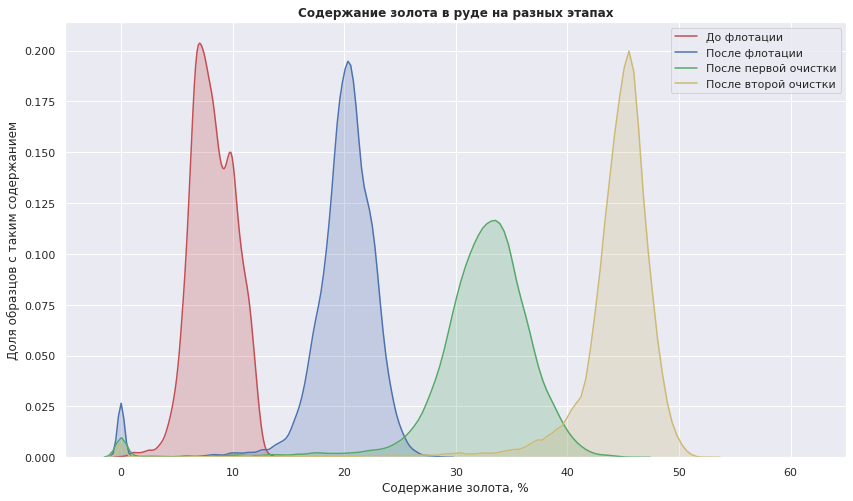

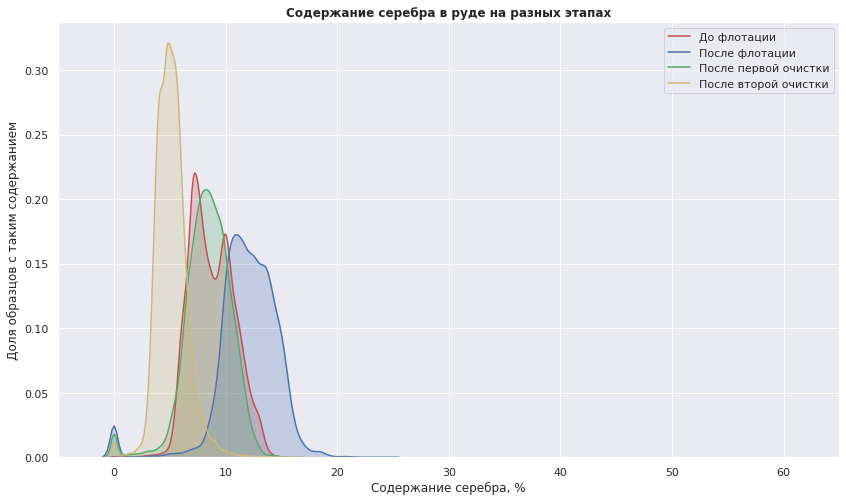

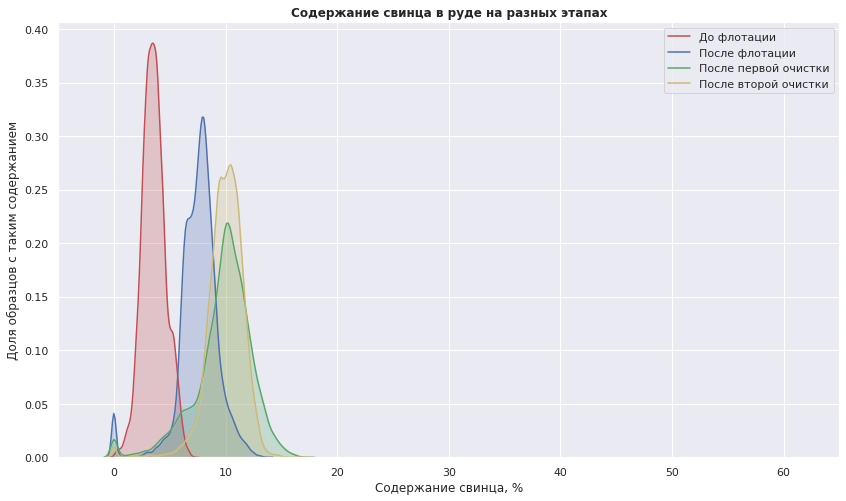

In [60]:
for row in [[df['rougher.input.feed_au'], df['rougher.output.concentrate_au'],
             df['primary_cleaner.output.concentrate_au'], df['final.output.concentrate_au'], 
             'Содержание золота в руде на разных этапах', 'Содержание золота, %'],
            [df['rougher.input.feed_ag'], df['rougher.output.concentrate_ag'],
             df['primary_cleaner.output.concentrate_ag'], df['final.output.concentrate_ag'],
             'Содержание серебра в руде на разных этапах', 'Содержание серебра, %'],
            [df['rougher.input.feed_pb'], df['rougher.output.concentrate_pb'],
             df['primary_cleaner.output.concentrate_pb'], df['final.output.concentrate_pb'],
             'Содержание свинца в руде на разных этапах', 'Содержание свинца, %']]:
    graph_metal_content(row[0], row[1], row[2], row[3], row[4], row[5])

Содержание золота на каждом ихз этапов увеличивается (чего и следовало ожидать, ведь это основаня цель производства). Содержание серебра во время флотации увеличивается, а во время первой и второй очистки уменьшается, что говорит о том, что серебро не отделяется во время флотации. Содержание свинца на каждом из этапов уменьшается.

Сравним распределения размера частиц сырья на тестовой и тренировочной выборках для того чтобы убедиться в том, что обученная на тренировочной выборке модель хорошо покажет себя на тестовой:

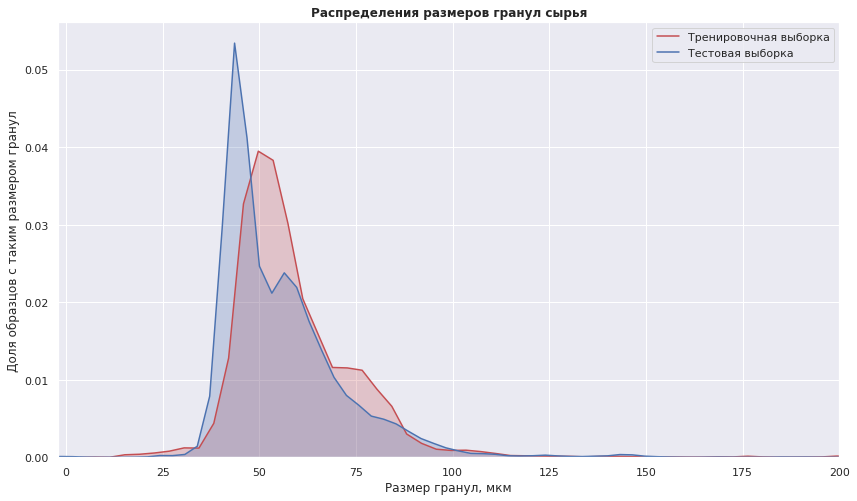

In [61]:
plt.figure(figsize=(14,8))
fig = sns.kdeplot(train['rougher.input.feed_size'], shade=True, 
                  color="r", label = 'Тренировочная выборка')
fig = sns.kdeplot(test['rougher.input.feed_size'], shade=True, 
                  color="b", label = 'Тестовая выборка')
plt.xlim(-2, 200)
fig.legend(loc='upper right')
fig.set_title('Распределения размеров гранул сырья', fontweight = 'bold')
plt.xlabel('Размер гранул, мкм')
plt.ylabel('Доля образцов с таким размером гранул')
plt.show()

Распределения отличаются несильно - оценка модели с помощью тестовой выборки будет верной.

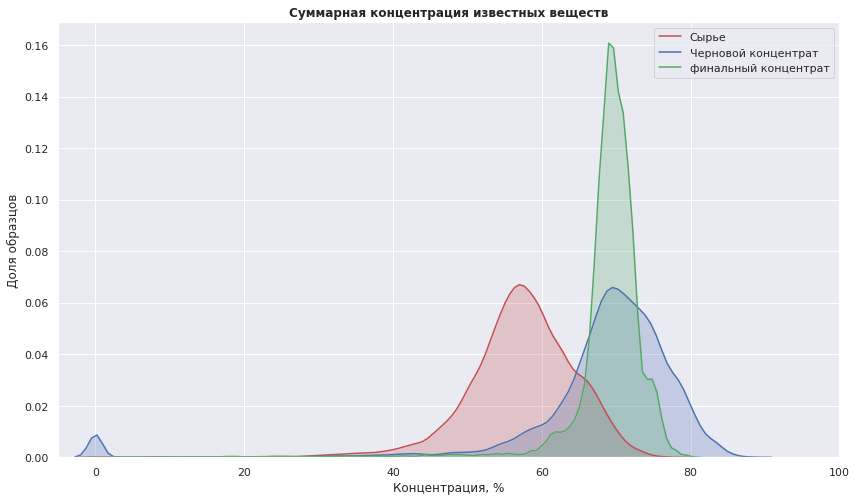

In [62]:
sum_raw = (df['rougher.input.feed_ag'] + df['rougher.input.feed_au'] + 
           df['rougher.input.feed_pb'] + df['rougher.input.feed_sol'])
sum_rougher = (df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_au'] + 
               df['rougher.output.concentrate_pb'] + df['rougher.output.concentrate_sol'])
sum_final = (df['final.output.concentrate_ag'] + df['final.output.concentrate_au'] + 
             df['final.output.concentrate_pb'] + df['final.output.concentrate_sol'])
plt.figure(figsize=(14,8))
fig = sns.kdeplot(sum_raw, shade=True, color="r", label = 'Сырье')
fig = sns.kdeplot(sum_rougher, shade=True, 
                  color="b", label = 'Черновой концентрат')
fig = sns.kdeplot(sum_final, shade=True, 
                  color="g", label = 'финальный концентрат')
plt.xlim(-5, 100)
fig.legend(loc='upper right')
fig.set_title('Суммарная концентрация известных веществ', fontweight = 'bold')
plt.xlabel('Концентрация, %')
plt.ylabel('Доля образцов')
plt.show()

Во время флотации в основном удаляются различные неизвестные примеси руды, тогда как во время очисток в том числе серебро-содержащие и свинец-содержащие. Среднее содержание концентрации известных веществ в черновом и финальном концентратах примерно одинаковое, а среднеквадратичное отклонение в финальном концентрате - меньше.

### Вывод

Были исследованы содержания различных металлов, а также суммарное содержание известных веществ на всех этапах очистки:
 1. Концентрация золота увеличивается на каждом из этапов.
 2. Концентрация серебра после флотации возрастает (так как серебро не отделяется в время флотации), а после первой и второй очистки снижается.
 3. Концентрация свинца уменьшается во время флотации и первой очистки, а после второй очистки практически не изменяется.
 4. Среднее значение суммарной концентрации всех известных веществ в черновом концентрате выше, чем в сырье, а среднеквадратическое отклонение такое же, тогда как в финальном концентрате среднее значение этой концентрации практически такое же, как в черновом, но среднеквадратическое отклонение гораздо меньше.
    
Кроме этого, было проверено, что распределения размера частиц сырья в тренировочной и тестовой части похожи.

## Модель

Разобъем тренировочную выборку по процессам: флотация,  то есть получение чернового концентрата, и очистки, то есть получение финального концентрата:

In [63]:
rr = []
for row in train.columns:
    if not re.match(r'rougher.*', row) == None:
        rr.append(re.match(r'rougher.*', row).group(0))
rougher_train = train.loc[:, train.columns.isin(rr)]

In [64]:
c = []
for row in train.columns:
    if not re.match(r'primary_cleaner.*', row) == None:
        c.append(re.match(r'primary_cleaner.*', row).group(0))
    if not re.match(r'secondary_cleaner.*', row) == None:
        c.append(re.match(r'secondary_cleaner.*', row).group(0))
    if not re.match(r'final.output.recovery', row) == None:
        c.append(re.match(r'final.output.recovery', row).group(0))
    if not re.match(r'rougher.output.recovery', row) == None:
        c.append(re.match(r'rougher.output.recovery', row).group(0))
    if not re.match(r'rougher.input.*', row) == None:
        c.append(re.match(r'rougher.input.*', row).group(0))
cleaner_train = train.loc[:, train.columns.isin(c)]

### Флотация

Выделим целевой признак и удалим те признаки, которых нет в тестовой выборке:

In [65]:
rougher_train_target = rougher_train['rougher.output.recovery']
rougher_train_features = rougher_train.drop(['rougher.calculation.sulfate_to_au_concentrate',
                                            'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                            'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                            'rougher.calculation.au_pb_ratio',
                                            'rougher.output.concentrate_ag',
                                            'rougher.output.concentrate_pb',
                                            'rougher.output.concentrate_sol',
                                            'rougher.output.concentrate_au',
                                            'rougher.output.recovery',
                                            'rougher.output.tail_ag',
                                            'rougher.output.tail_pb',
                                            'rougher.output.tail_sol',
                                            'rougher.output.tail_au'], axis = 1)

Чтобы функция кросс-валидации работала с метрикой sMAPE, создадим scorer из функции, считающей эту метрику:

In [66]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
smape_scoring = make_scorer(smape)

In [67]:
progress = ProgressBar().start()
min_s = 300
count = 0
for n_est in range(10, 51, 10):
    for depth in range(1, 11):
        model = RandomForestRegressor(random_state = 12345, 
                                      n_estimators = n_est, max_depth = depth)
        s = cross_val_score(model, rougher_train_features, rougher_train_target, 
                            cv = 5, scoring = smape_scoring)
        s = sum(s) / len(s)
        if s < min_s:
            min_s = s 
            best_forest_rougher = model
        count += 1
        progress.update(count)
progress.finish()
print(min_s)

| |                                 #                | 50 Elapsed Time: 0:10:46


11.574160235545147


In [68]:
linear_rougher = LinearRegression()
s = cross_val_score(linear_rougher, rougher_train_features, rougher_train_target,
                    cv = 5, scoring = smape_scoring)
s = sum(s) / len(s)
print(s)

12.094609542124266


Наименьшее значение sMAPE наблюдается у модели случайного леса, обучим её на всей тренировочной выборке.

In [69]:
best_forest_rougher.fit(rougher_train_features, rougher_train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

### Очистка

Проделаем все то же самое для данных о первой и второй очистке и обучим модели, которые будут предсказывать эффективность получения финального концентрата. То, как прошла флотация, также влияет на финальный концентрат, поэтому в признаках в том числе будут характеристики руды до флотации и эффективность флотации.

In [70]:
cleaner_train_target = cleaner_train['final.output.recovery']
cleaner_train_features = cleaner_train.drop(['final.output.recovery',
                                             'primary_cleaner.output.concentrate_ag',
                                             'primary_cleaner.output.concentrate_pb',
                                             'primary_cleaner.output.concentrate_sol',
                                             'primary_cleaner.output.concentrate_au',
                                             'primary_cleaner.output.tail_ag',
                                             'primary_cleaner.output.tail_pb',
                                             'primary_cleaner.output.tail_sol',
                                             'primary_cleaner.output.tail_au',
                                             'secondary_cleaner.output.tail_ag',
                                             'secondary_cleaner.output.tail_pb',
                                             'secondary_cleaner.output.tail_sol',
                                             'secondary_cleaner.output.tail_au'], axis = 1)

In [71]:
progress = ProgressBar().start()
min_s = 300
count = 0
for n_est in range(10, 51, 10):
    for depth in range(1, 11):
        model = RandomForestRegressor(random_state = 12345, 
                                      n_estimators = n_est, max_depth = depth)
        s = cross_val_score(model, cleaner_train_features, cleaner_train_target, 
                            cv = 5, scoring = smape_scoring)
        s = sum(s) / len(s)
        if s < min_s:
            min_s = s 
            best_forest_cleaner = model
        count += 1
        progress.update(count)
progress.finish()
print(min_s)

| |                                 #                | 50 Elapsed Time: 0:18:53


9.118467282155441


In [72]:
linear_cleaner = LinearRegression()
s = cross_val_score(linear_cleaner, cleaner_train_features, cleaner_train_target, 
                    cv = 5, scoring = smape_scoring)
s = sum(s) / len(s)
print(s)

11.298943262637577


Наименьшее значение sMAPE наблюдается у модели случайного леса, обучим её на всей тренировочной выборке.

In [73]:
best_forest_cleaner.fit(cleaner_train_features, cleaner_train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

### Объединение

Напишем функцию, разделяющую признаки на относящиеся к очистке и флотации, получающую значения rougher.output.recovery из предсказаний первой модели, передающую эти данные второй модели и с помощью второй модели предсказывающую final.output.recovery. Кроме того, функция будет заполнять пропуски в данных, основываясь на дате и времени:

In [74]:
def predict_recoveries(df):
    df.set_index(pd.DatetimeIndex(test['date']), inplace = True)
    df.interpolate(method = 'time', axis = 0, inplace = True, limit_direction = 'both')
    rr = []
    for row in df.columns:
        if not re.match(r'rougher.input.*', row) == None:
            rr.append(re.match(r'rougher.input.*', row).group(0))
        if not re.match(r'rougher.state.*', row) == None:
            rr.append(re.match(r'rougher.state.*', row).group(0))
    df_rougher = df.loc[:, df.columns.isin(rr)]
    rr = []
    rougher_predictions = best_forest_rougher.predict(df_rougher)
    for row in df.columns:
        if not re.match(r'rougher.input.*', row) == None:
            rr.append(re.match(r'rougher.input.*', row).group(0))
        if not re.match(r'primary_cleaner.input.*', row) == None:
            rr.append(re.match(r'primary_cleaner.input.*', row).group(0))
        if not re.match(r'primary_cleaner.state.*', row) == None:
            rr.append(re.match(r'primary_cleaner.state.*', row).group(0))
        if not re.match(r'secondary_cleaner.state.*', row) == None:
            rr.append(re.match(r'secondary_cleaner.state.*', row).group(0))
    df_cleaner = df.loc[:, df.columns.isin(rr)]
    df_cleaner['rougher.output.recovery'] = rougher_predictions
    final_predictions = best_forest_cleaner.predict(df_cleaner)
    return rougher_predictions, final_predictions

### Тестирование

Для проведения тестирования в тестовой выборке нужно создать столбцы с истинными значениями rougher.output.recovery и final.output.recovery, отобрав эти значения из исходных данных по дате.

In [75]:
test.set_index(pd.DatetimeIndex(test['date']), inplace = True)
test = test.join(df.loc[:, ['rougher.output.recovery', 'final.output.recovery']], how='left')

Теперь создадим фунцию, считающую итоговый sMAPE:

In [76]:
def final_smape(rougher_recovery_true, rougher_recovery_pr,
                final_recovery_true, final_recovery_pr):
    f = (0.25 * smape(rougher_recovery_true, rougher_recovery_pr) + 
         0.75 * smape(final_recovery_true, final_recovery_pr))
    return f

In [77]:
rougher_recovery_test, final_recovery_test = predict_recoveries(test)
final = final_smape(test['rougher.output.recovery'].values, rougher_recovery_test,
                    test['final.output.recovery'].values, final_recovery_test)
print('Итоговое значение sMAPE на тестовой выборке:', final)

Итоговое значение sMAPE на тестовой выборке: 14.83141169765005


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Общий вывод

1. Были обучены модели случайного леса с количеством деревьев от 10 до 50 и максимальной глубиной дерева от 1 до 10, а также модели линейной регрессии для процессов флотации и очистки. Наименьшие значения sMAPE в обоих случаях наблюдалисьу моделей случайного леса.
2. Была написана функция, выделяющая из данных столбцы, необходимые для обучения моделей, заполняющая в данных пропуски и предсказывающая значения эффективности обогащения чернового и финального концентратов.
3. Итоговое значение sMAPE на тестовой выборке - 14.83 